In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Load dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


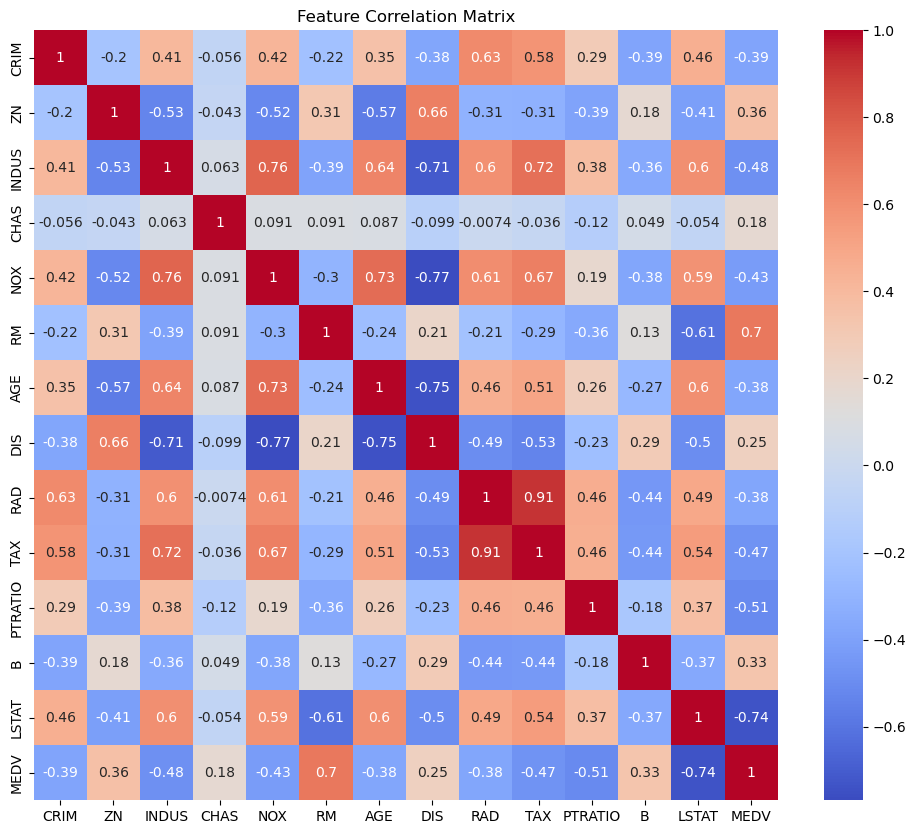

In [2]:
print(df.info())
display(df.describe())
display(df.head())

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


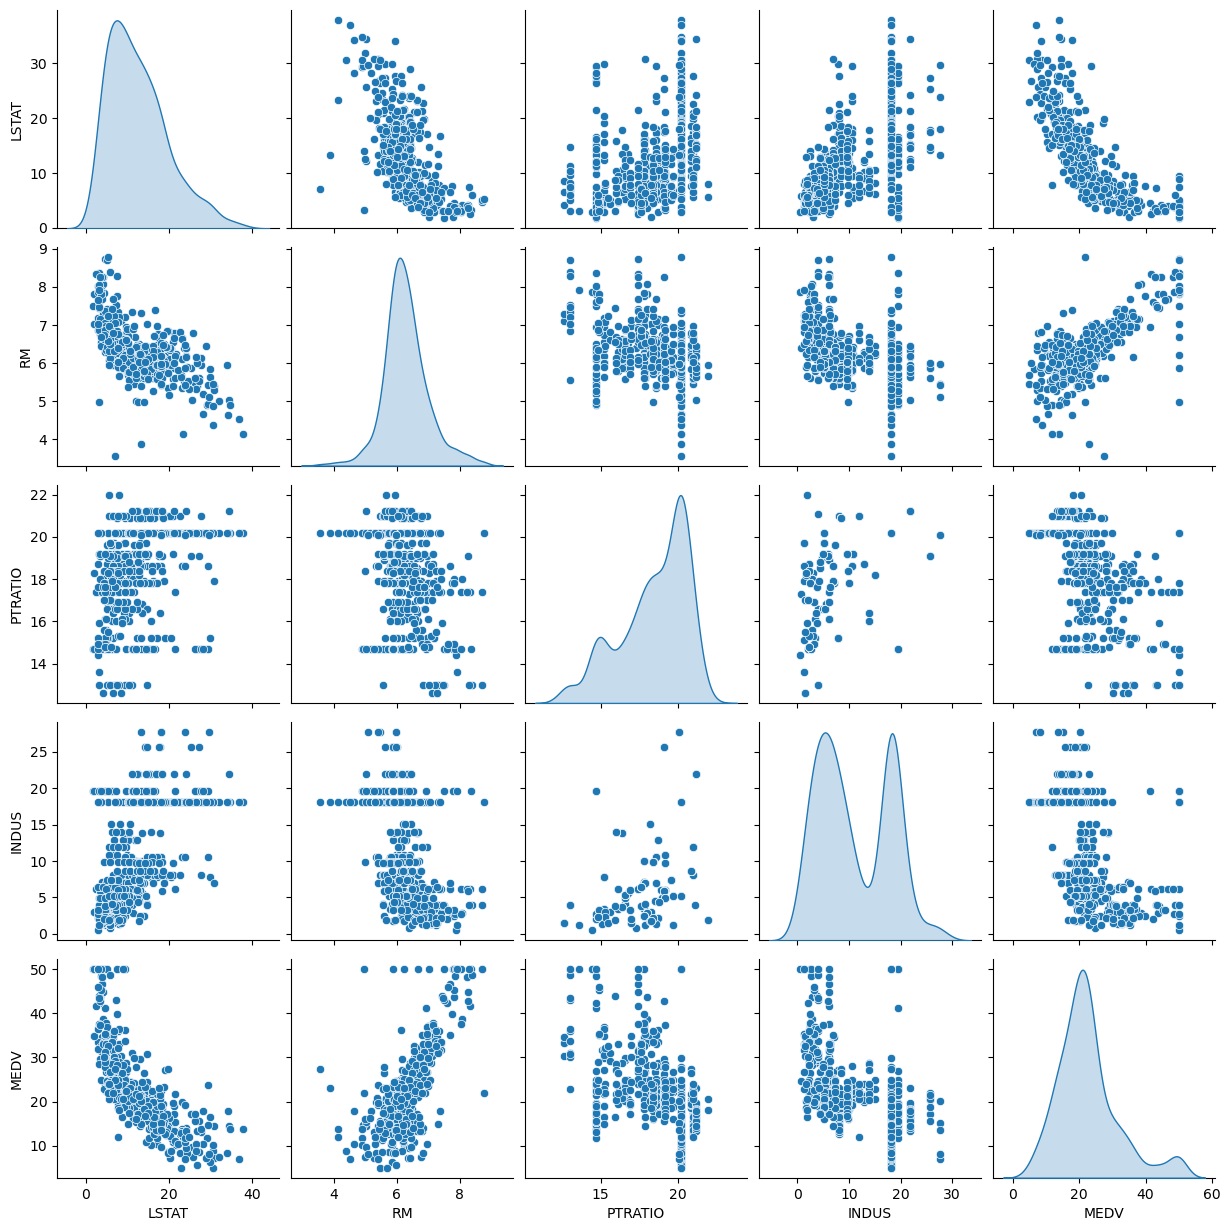

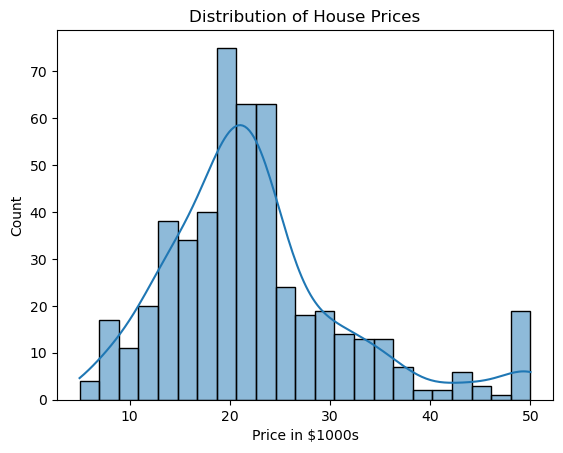

In [3]:
# Top correlated features with PRICE
top_corr_features = df.corr()['MEDV'].abs().sort_values(ascending=False)[1:5].index.tolist()

# Pairplot
sns.pairplot(df[top_corr_features + ['MEDV']], diag_kind='kde')
plt.show()

# Price distribution
sns.histplot(df['MEDV'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price in $1000s")
plt.show()


In [5]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


R² Score: 0.668759493535632
MSE: 24.291119474973513
RMSE: 4.928602182665336


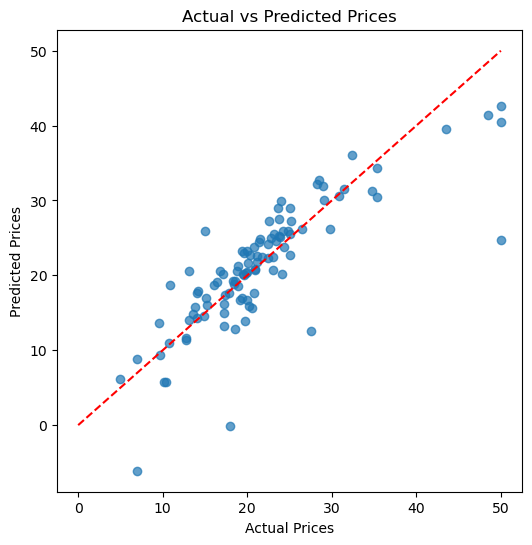

In [6]:
# Model training
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)

# Evaluation metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Prediction vs Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [7]:
# Coefficients with feature names
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"])
print("Intercept:", lr.intercept_)
display(coeff_df.sort_values(by="Coefficient", ascending=False))


Intercept: 22.796534653465343


,Coefficient
RM,3.145240
RAD,2.251407
B,1.129568
CHAS,0.718738
ZN,0.696269
INDUS,0.278065
AGE,-0.176048
CRIM,-1.002135
TAX,-1.767014
NOX,-2.022319


In [8]:
import pickle


In [10]:
pickle.dump(lr,open('regmodel.pkl','wb'))

In [11]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [15]:
sample = X.iloc[[0]]  # Use double brackets to keep it as a DataFrame

# Scale the sample
sample_scaled = scaler.transform(sample)

# Predict using pickled model
prediction = pickled_model.predict(sample_scaled)

print("Predicted price:", prediction[0])

Predicted price: 29.953396377335693
